# Machine Learning

### **目录**

1.  **引言：什么是经典机器学习？**
2.  **监督学习 (Supervised Learning)**
    *   2.1 **线性回归 (Linear Regression)**
        *   内容、公式推导、代码、优缺点
    *   2.2 **逻辑回归 (Logistic Regression)**
        *   内容、公式推导、代码、优缺点
    *   2.3 **支持向量机 (Support Vector Machine, SVM)**
        *   内容、公式推导、代码、优缺点
    *   2.4 **决策树 (Decision Tree)**
        *   内容、公式推导、代码、优缺点
    *   2.5 **集成学习 (Ensemble Learning): 随机森林 & GBDT**
        *   内容、原理、代码、优缺点
3.  **无监督学习 (Unsupervised Learning)**
    *   3.1 **K-均值聚类 (K-Means Clustering)**
        *   内容、公式推导、代码、优缺点
    *   3.2 **主成分分析 (Principal Component Analysis, PCA)**
        *   内容、公式推导、代码、优缺点
4.  **经典机器学习的最新成果与现代视角**
5.  **总结**

***

### **1. 引言：什么是经典机器学习？**

经典机器学习通常指的是在深度学习浪潮（约2012年）之前占据主导地位的一系列算法。这些算法在处理**结构化数据（如表格数据）**方面非常强大，并且具有**可解释性强、计算资源要求较低、理论基础坚实**等优点。

它们通常分为三大类：
*   **监督学习**：使用带有标签的数据进行训练，模型学习从输入到输出的映射关系。例如，根据房屋特征预测房价（回归），或判断邮件是否为垃圾邮件（分类）。
*   **无监督学习**：使用没有标签的数据，模型学习数据内在的结构或模式。例如，将客户分群（聚类），或对数据进行降维。
*   **强化学习**：模型（智能体）通过与环境交互来学习，目标是最大化累积奖励。

本指南将重点介绍监督学习和无监督学习中最经典、最核心的算法。

---

### **2. 监督学习 (Supervised Learning)**

#### **2.1 线性回归 (Linear Regression)**

**内容**

*   **目标**：找到一条直线（或高维超平面），使得数据点到这条直线的距离之和最小。用于预测连续值，是回归问题的基石。
*   **核心思想**：假设输入特征 `x` 和输出 `y` 之间存在线性关系。
    *   模型可以表示为：$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n = \theta^T x$
    *   其中 $\theta$ 是模型参数（权重），$x_0$ 通常设为1（偏置项）。

**公式推导 (基于最小二乘法和梯度下降)**

1.  **假设函数 (Hypothesis)**：
    $h_\theta(x) = \sum_{i=0}^{n} \theta_i x_i = \theta^T x$

2.  **损失函数 (Cost Function)**：我们使用**均方误差 (Mean Squared Error, MSE)** 来衡量预测值与真实值之间的差距。
    $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$
    这里的 `m` 是样本数量。乘以 `1/2` 是为了在求导时方便计算，不影响最终结果。

3.  **目标**：找到一组参数 $\theta$，使得 $J(\theta)$ 最小。
    $\min_{\theta} J(\theta)$

4.  **梯度下降 (Gradient Descent)**：通过迭代更新 $\theta$ 来逐步减小 $J(\theta)$。
    *   首先，计算 $J(\theta)$ 对 $\theta_j$ 的偏导数（梯度）：
        $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$
        $= \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot \frac{\partial}{\partial \theta_j} (\sum_{k=0}^{n} \theta_k x_k^{(i)} - y^{(i)})$
        $= \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

    *   **更新规则**：将参数 $\theta_j$ 沿着梯度的反方向移动一小步，步长由学习率 $\alpha$ 控制。
        $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$
        这个更新规则需要对所有 `j`（从0到n）同时进行。

**证明：损失函数 $J(\theta)$ 的凸性**
$J(\theta)$ 是一个二次函数，其二阶导数矩阵（Hessian矩阵）是半正定的，因此 $J(\theta)$ 是一个凸函数。这意味着梯度下降法可以保证找到全局最优解（或其一），而不会陷入局部最优。

模型截距 (theta_0): 4.1429
模型系数 (theta_1): 2.7993
测试集上的均方误差 (MSE): 0.6537


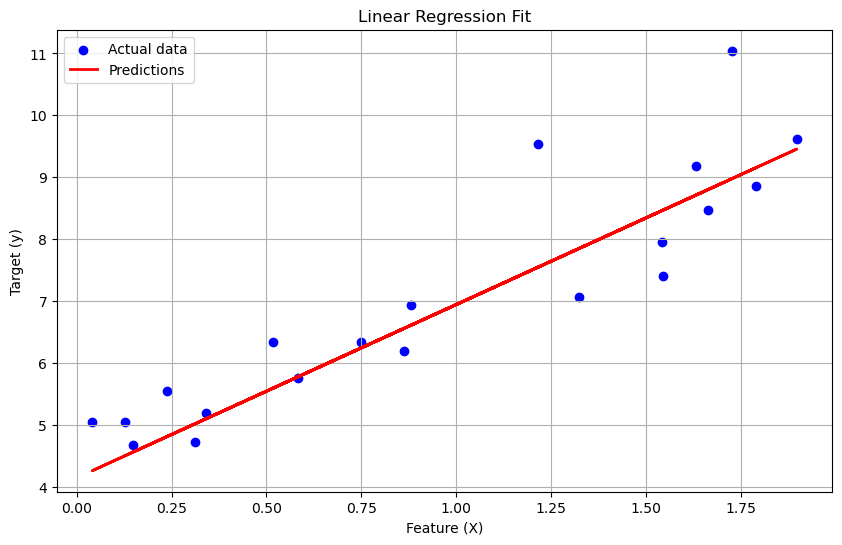

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 生成模拟数据
# %matplotlib inline # 在Jupyter中取消注释
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 生成一个特征
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + 噪音

# 2. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 创建并训练模型
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. 查看模型参数
print(f"模型截距 (theta_0): {lin_reg.intercept_[0]:.4f}")
print(f"模型系数 (theta_1): {lin_reg.coef_[0][0]:.4f}")

# 5. 做出预测并评估
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"测试集上的均方误差 (MSE): {mse:.4f}")

# 6. 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predictions')
plt.title('Linear Regression Fit')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()

**优缺点总结**
*   **优点**：模型简单，易于理解和解释；计算速度快；当数据线性关系明显时效果好。
*   **缺点**：对非线性关系拟合能力差；对异常值敏感。

---

#### **2.2 逻辑回归 (Logistic Regression)**

**内容**

*   **目标**：用于解决二分类问题（例如，是/否，1/0）。它名为“回归”，但本质上是**分类算法**。
*   **核心思想**：将线性回归的输出通过一个**Sigmoid函数**（或称Logistic函数）映射到 (0, 1) 区间，得到的结果可以视为样本属于正类的**概率**。
    *   Sigmoid函数: $\sigma(z) = \frac{1}{1 + e^{-z}}$

**公式推导 (基于最大似然估计)**

1.  **假设函数**：输出样本为正类 (y=1) 的概率。
    $h_\theta(x) = P(y=1|x; \theta) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$
    则样本为负类 (y=0) 的概率为 $P(y=0|x; \theta) = 1 - h_\theta(x)$。

2.  **似然函数 (Likelihood Function)**：将两个概率公式合并，对于单个样本 $(x^{(i)}, y^{(i)})$，其概率可以写为：
    $P(y^{(i)}|x^{(i)}; \theta) = (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1-y^{(i)}}$
    假设样本独立同分布，整个数据集的似然函数为所有样本概率的乘积：
    $L(\theta) = \prod_{i=1}^{m} P(y^{(i)}|x^{(i)}; \theta) = \prod_{i=1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1-y^{(i)}}$

3.  **对数似然函数**：为了计算方便，我们最大化对数似然函数 $\ell(\theta) = \log L(\theta)$：
    $\ell(\theta) = \sum_{i=1}^{m} [ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) ]$

4.  **损失函数**：最大化似然函数等价于最小化其相反数。我们定义损失函数（也称为**交叉熵损失 Cross-Entropy Loss**）为平均负对数似然：
    $J(\theta) = -\frac{1}{m} \ell(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) ]$

5.  **梯度下降**：计算 $J(\theta)$ 对 $\theta_j$ 的偏导数（推导过程略，但结果非常优美）：
    $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$
    更新规则与线性回归形式上完全相同！
    $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

**证明：损失函数 $J(\theta)$ 的凸性**
可以证明，逻辑回归的交叉熵损失函数 $J(\theta)$ 是一个凸函数，因此梯度下降法同样可以找到全局最优解。


模型准确率: 0.8800


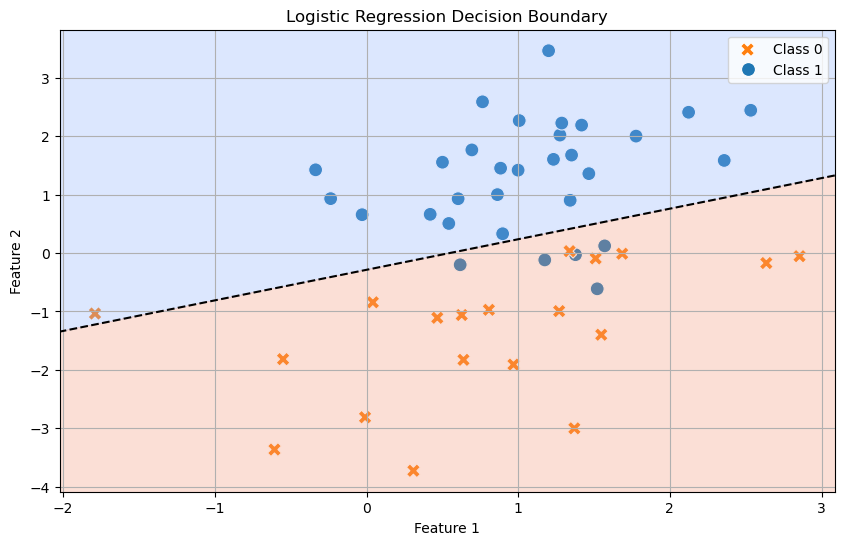

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 1. 生成模拟数据
# %matplotlib inline
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, n_clusters_per_class=1)

# 2. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. 创建并训练模型
log_reg = LogisticRegression(solver='liblinear') # liblinear适合小数据集
log_reg.fit(X_train, y_train)

# 4. 做出预测并评估
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

# 5. 可视化决策边界
plt.figure(figsize=(10, 6))
# 绘制数据点
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=y_test, s=100)

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                   np.linspace(ylim[0], ylim[1], 100))
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])
plt.grid(True)
plt.show()

**优缺点总结**
*   **优点**：模型简单，速度快；输出结果易于理解（概率）；可解释性强。
*   **缺点**：容易欠拟合，对非线性边界分类效果差；特征空间很大时表现可能不佳。

---

#### **2.3 支持向量机 (Support Vector Machine, SVM)**

**内容**

*   **目标**：找到一个**最大间隔超平面 (Maximum Margin Hyperplane)**，将不同类别的样本分开。
*   **核心思想**：不仅要正确分类，还要让距离最近的样本点（即**支持向量, Support Vectors**）到分类边界的距离最大化。这使得模型具有更好的泛化能力。
*   **核技巧 (Kernel Trick)**：通过核函数，SVM可以高效地处理非线性问题，将数据映射到高维空间，从而在高维空间中找到一个线性分界面。

**公式推导 (硬间隔线性SVM)**

1.  **超平面定义**：在特征空间中，超平面可以表示为 $w^T x + b = 0$。
2.  **分类规则**：
    *   如果 $w^T x_i + b > 0$，则 $y_i = +1$。
    *   如果 $w^T x_i + b < 0$，则 $y_i = -1$。
    我们可以统一要求：$y_i(w^T x_i + b) \ge 1$。（这被称为**函数间隔**大于等于1）
3.  **几何间隔**：样本点 $x_i$ 到超平面的距离为 $\gamma_i = \frac{|w^T x_i + b|}{||w||}$。根据上一条，我们有 $\gamma_i = \frac{y_i(w^T x_i + b)}{||w||} \ge \frac{1}{||w||}$。
4.  **最大化间隔**：我们的目标是最大化这个最小间隔 $\frac{1}{||w||}$。
    $\max_{w,b} \frac{1}{||w||}$
    这等价于最小化 $||w||$，也等价于最小化 $\frac{1}{2}||w||^2$（为了方便求导）。
5.  **优化问题 (原始问题)**：
    $\min_{w,b} \frac{1}{2} ||w||^2$
    $\text{subject to } y_i(w^T x_i + b) \ge 1, \quad i=1, \dots, m$

**软间隔与对偶问题**
*   **软间隔 (Soft Margin)**：为了处理非线性可分或有噪声的数据，我们引入松弛变量 $\xi_i \ge 0$，允许一些点不满足间隔约束。
    $\min_{w,b,\xi} \frac{1}{2} ||w||^2 + C \sum_{i=1}^m \xi_i$
    $\text{s.t. } y_i(w^T x_i + b) \ge 1 - \xi_i, \quad \xi_i \ge 0$
    这里的 `C` 是一个惩罚参数，用于权衡间隔大小和误分类点。

*   **对偶问题 (Dual Problem)**：通过拉格朗日乘子法，可以将原始问题转化为对偶问题。对偶问题的优美之处在于，它只依赖于样本点之间的**内积**。
    $\max_{\alpha} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j (x_i^T x_j)$
    $\text{s.t. } \sum_{i=1}^m \alpha_i y_i = 0, \quad 0 \le \alpha_i \le C$
    这里的 $\alpha_i$ 是拉格朗日乘子。

*   **核技巧 (Kernel Trick)**：如果原始数据非线性可分，我们可以通过一个映射 $\phi(x)$ 将其映射到高维空间。在对偶问题中，我们只需要计算 $\phi(x_i)^T \phi(x_j)$。我们可以定义一个核函数 $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$，从而**无需显式地计算高维映射**，极大地提高了效率。
    *   **常用核函数**：
        *   **线性核**：$K(x_i, x_j) = x_i^T x_j$
        *   **多项式核**：$K(x_i, x_j) = (x_i^T x_j + c)^d$
        *   **高斯核 (RBF)**：$K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$

SVM模型准确率: 0.9800


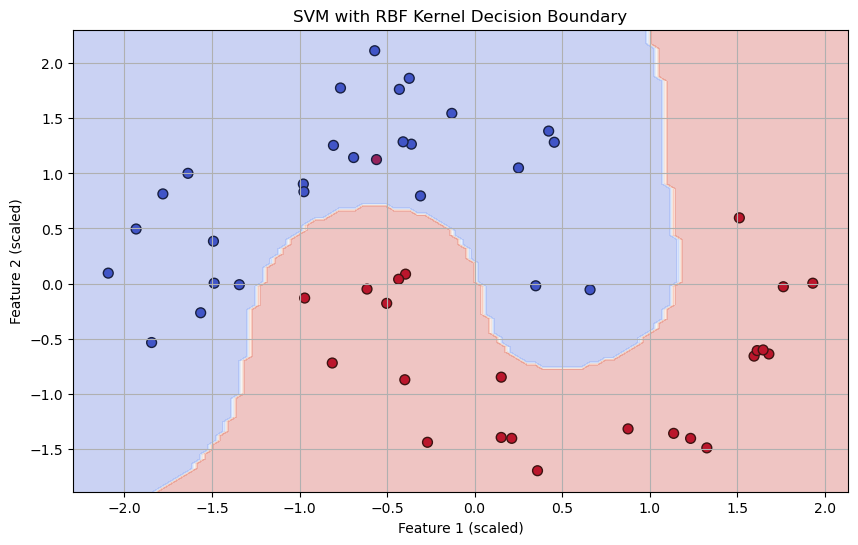

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 1. 生成非线性模拟数据
# %matplotlib inline
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# 2. 特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 4. 创建并训练SVM模型 (使用RBF核)
# C是惩罚参数, gamma是RBF核的参数
svm_clf = SVC(kernel='rbf', C=10, gamma=0.5, probability=True)
svm_clf.fit(X_train, y_train)

# 5. 评估
accuracy = svm_clf.score(X_test, y_test)
print(f"SVM模型准确率: {accuracy:.4f}")

# 6. 可视化决策边界
def plot_decision_boundary(clf, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolors='k')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                       np.linspace(ylim[0], ylim[1], 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.grid(True)
    plt.show()

plot_decision_boundary(svm_clf, X_test, y_test)

**优缺点总结**
*   **优点**：在高维空间中表现优异；通过核技巧可以有效处理非线性问题；理论完备，泛化能力强。
*   **缺点**：对大规模数据集训练较慢；对参数（如 `C` 和 `gamma`）和核函数的选择敏感；模型解释性不如逻辑回归和决策树。

---

#### **2.4 决策树 (Decision Tree)**

**内容**

*   **目标**：构建一个树形结构模型，通过一系列“是/否”问题来对数据进行决策和分类（或回归）。
*   **核心思想**：在每一步选择一个**最优特征**来划分数据集，使得划分后的子集**纯度最高**（即类别尽可能一致）。这个过程递归进行，直到满足停止条件。

**公式推导 (ID3, C4.5, CART)**

决策树的关键在于如何选择最优划分特征。主要有三种标准：

1.  **信息增益 (Information Gain) - ID3算法**
    *   **熵 (Entropy)**：衡量一个数据集的混乱程度或不确定性。熵越大，不确定性越高。
        $H(D) = -\sum_{k=1}^{K} p_k \log_2(p_k)$
        其中 $D$ 是数据集，$K$ 是类别数，$p_k$ 是第 $k$ 类样本所占的比例。
    *   **条件熵 (Conditional Entropy)**：在已知特征 $A$ 的情况下，数据集 $D$ 的不确定性。
        $H(D|A) = \sum_{v=1}^{V} \frac{|D^v|}{|D|} H(D^v)$
        其中 $A$ 有 $V$ 个可能的取值， $D^v$ 是 $D$ 中特征 $A$ 取值为 $v$ 的样本子集。
    *   **信息增益 (Information Gain)**：划分前后熵的减少量。增益越大，说明用特征 $A$ 来划分所获得的“纯度提升”越大。
        $Gain(D, A) = H(D) - H(D|A)$
    *   **ID3算法**：在每个节点选择信息增益最大的特征进行划分。

2.  **信息增益率 (Gain Ratio) - C4.5算法**
    *   **问题**：信息增益偏向于选择取值较多的特征（例如ID号）。
    *   **解决方法**：用信息增益除以特征自身的熵（固有值, Intrinsic Value）。
        $Gain\_ratio(D, A) = \frac{Gain(D, A)}{IV(A)}$, where $IV(A) = -\sum_{v=1}^{V} \frac{|D^v|}{|D|} \log_2(\frac{|D^v|}{|D|})$
    *   **C4.5算法**：使用信息增益率作为划分标准。

3.  **基尼不纯度 (Gini Impurity) - CART算法**
    *   **基尼指数**：衡量从数据集中随机抽取两个样本，其类别标记不一致的概率。基尼指数越小，数据集纯度越高。
        $Gini(D) = 1 - \sum_{k=1}^{K} p_k^2$
    *   **划分后的基尼指数**：
        $Gini\_index(D, A) = \sum_{v=1}^{V} \frac{|D^v|}{|D|} Gini(D^v)$
    *   **CART (Classification and Regression Tree) 算法**：选择使得划分后基尼指数最小的特征和切分点。CART生成的是二叉树。

决策树模型准确率: 1.0000


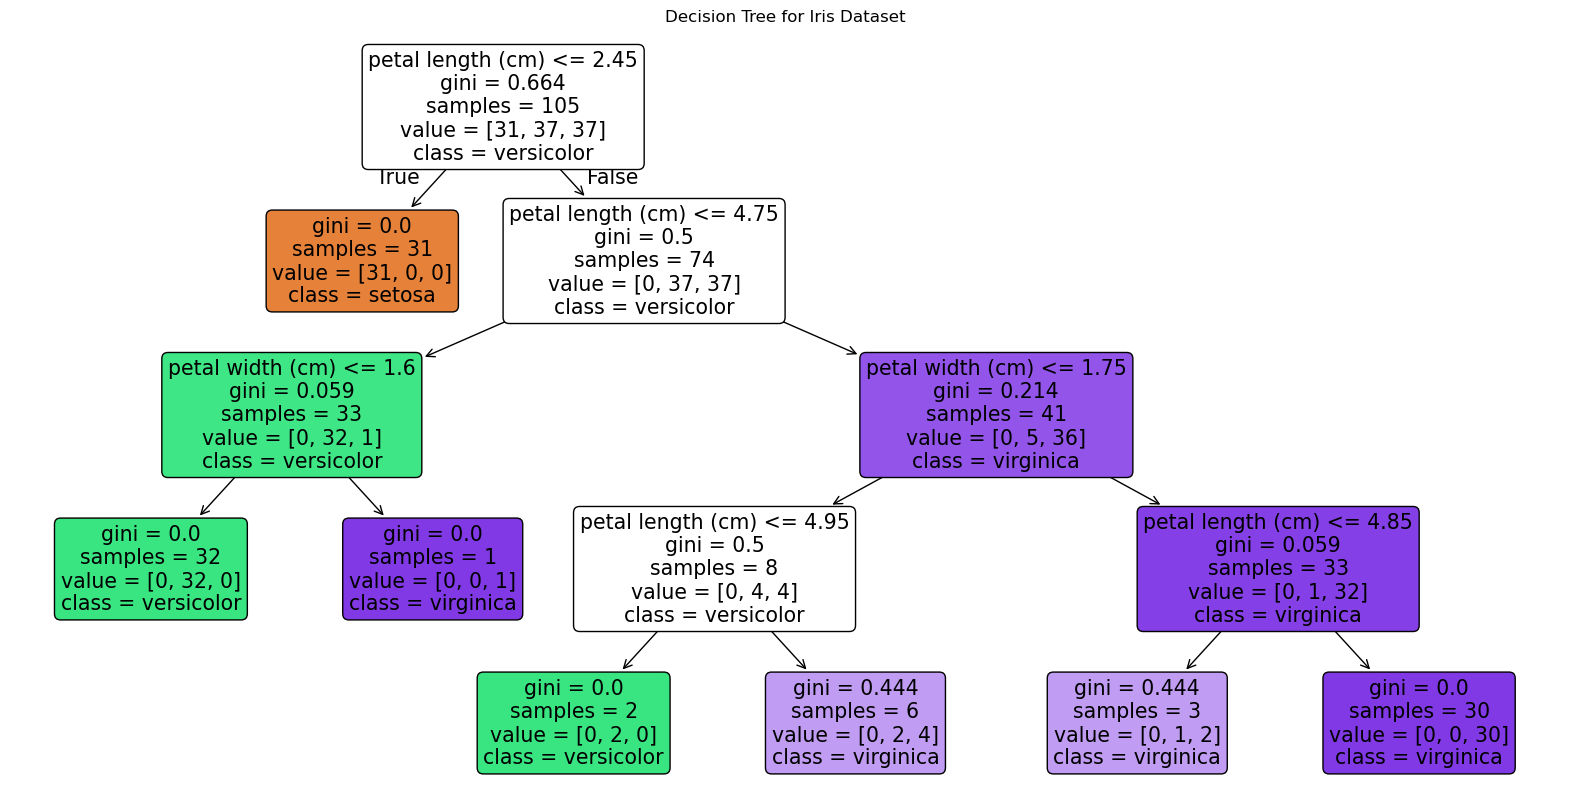

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 1. 加载数据集
# %matplotlib inline
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 创建并训练决策树模型
# max_depth限制树的深度以防止过拟合
# criterion可以选择 'gini' 或 'entropy'
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# 4. 评估
accuracy = tree_clf.score(X_test, y_test)
print(f"决策树模型准确率: {accuracy:.4f}")

# 5. 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

**优缺点总结**
*   **优点**：模型直观，易于解释（白盒模型）；可以处理数值型和类别型特征；对数据预处理要求不高（如缩放）。
*   **缺点**：容易过拟合，泛化能力较弱；对数据微小变化敏感，可能导致树结构剧烈变化；单个决策树性能通常不是最优的。

---

#### **2.5 集成学习 (Ensemble Learning): 随机森林 & GBDT**

**内容**

*   **目标**：通过结合多个学习器（通常是决策树）的预测结果来获得比单一学习器更好的性能。
*   **核心思想**："三个臭皮匠，顶个诸葛亮"。
    *   **Bagging (Bootstrap Aggregating)**：并行训练多个学习器，每个学习器在**有放回采样**的数据子集上训练。代表算法是**随机森林 (Random Forest)**。
    *   **Boosting**：串行训练多个学习器，每个新的学习器都**重点关注前一个学习器做错的样本**。代表算法是**梯度提升决策树 (Gradient Boosting Decision Tree, GBDT)**。

**原理**

1.  **随机森林 (Random Forest)**
    *   **随机性来源**：
        1.  **行采样 (Bootstrap)**：每个基学习器（决策树）都在从原始数据集中有放回抽样得到的子集上训练。
        2.  **列采样 (Feature Subspacing)**：在每个节点进行分裂时，不是从所有特征中选择最优，而是从一个**随机选择的特征子集**中选择最优。
    *   **优点**：这两重随机性使得基学习器之间差异性更大，从而降低了模型的方差，有效防止过拟合，性能强大且稳定。

2.  **梯度提升决策树 (GBDT)**
    *   **工作流程**：
        1.  初始化一个简单的模型（例如，所有样本的平均值）。
        2.  计算当前模型预测结果与真实值之间的**残差 (Residual)**。
        3.  训练一个新的决策树来**拟合这个残差**。
        4.  将新树的预测结果（乘以一个学习率）加到当前模型上，得到新的模型。
        5.  重复步骤2-4，直到达到预设的树的数量。
    *   **本质**：GBDT是在函数空间中进行梯度下降。每一步都是在拟合损失函数的负梯度方向。

随机森林准确率: 0.9333
GBDT准确率: 0.9133


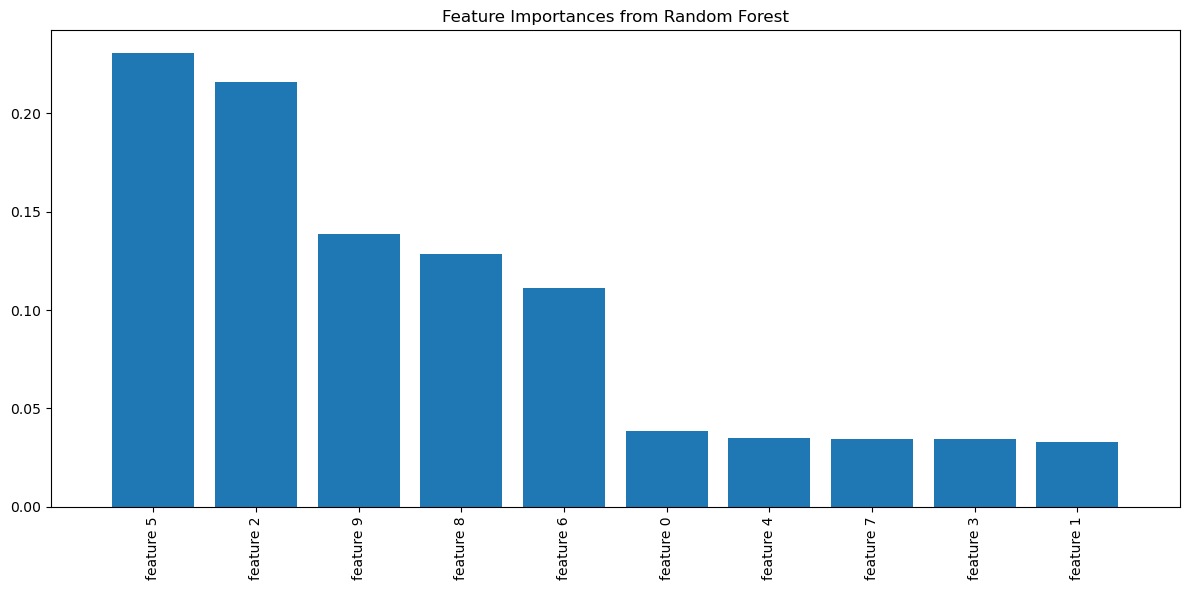

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# 1. 生成模拟数据
# %matplotlib inline
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# 2. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 训练随机森林
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"随机森林准确率: {accuracy_score(y_test, rf_pred):.4f}")

# 4. 训练GBDT
gbdt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_clf.fit(X_train, y_train)
gbdt_pred = gbdt_clf.predict(X_test)
print(f"GBDT准确率: {accuracy_score(y_test, gbdt_pred):.4f}")

# 5. 特征重要性可视化 (以随机森林为例)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f'feature {i}' for i in range(X.shape[1])]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

**优缺点总结**
*   **随机森林**
    *   **优点**：性能强大，抗过拟合能力强；可以并行计算，训练速度快；对缺失值和异常值不敏感。
    *   **缺点**：模型复杂度高，可解释性差（黑盒）；在某些噪声较大的数据集上可能过拟合。
*   **GBDT**
    *   **优点**：预测精度通常比随机森林更高；能够处理多种类型的损失函数。
    *   **缺点**：基学习器之间是串行关系，难以并行训练，速度较慢；对参数设置非常敏感。

---

### **3. 无监督学习 (Unsupervised Learning)**

#### **3.1 K-均值聚类 (K-Means Clustering)**

**内容**

*   **目标**：将数据集划分为 `K` 个簇 (cluster)，使得同一个簇内的点彼此相似，而不同簇的点相异。
*   **核心思想**：一个迭代算法。
    1.  **初始化**：随机选择 `K` 个点作为初始质心 (centroid)。
    2.  **分配 (Assignment)**：将每个数据点分配到离它最近的质心所在的簇。
    3.  **更新 (Update)**：重新计算每个簇的质心（即该簇所有点的均值）。
    4.  **重复**步骤2和3，直到质心位置不再变化或变化很小。

**公式推导**

K-Means的目标是最小化**簇内平方和 (Within-Cluster Sum of Squares, WCSS)**，也称为**惯性 (Inertia)**。
$J = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$
其中 $C_k$ 是第 $k$ 个簇，$\mu_k$ 是第 $k$ 个簇的质心。

*   **分配步骤**是在固定 $\mu_k$ 的情况下，通过将每个 $x_i$ 分配给最近的 $\mu_k$ 来最小化 $J$。
*   **更新步骤**是在固定分配的情况下，通过将 $\mu_k$ 设置为簇 $C_k$ 中所有点的均值来最小化 $J$。
    *   **证明**：对于一个簇 $C_k$，要最小化 $\sum_{x_i \in C_k} ||x_i - \mu||^2$，我们对其求关于 $\mu$ 的导数并令其为0：
        $\frac{\partial}{\partial \mu} \sum_{x_i \in C_k} (x_i - \mu)^2 = \sum_{x_i \in C_k} -2(x_i - \mu) = 0$
        $\Rightarrow \sum_{x_i \in C_k} x_i = \sum_{x_i \in C_k} \mu = |C_k| \mu$
        $\Rightarrow \mu = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i$
        这证明了质心应该是簇内点的均值。

e:\Download\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


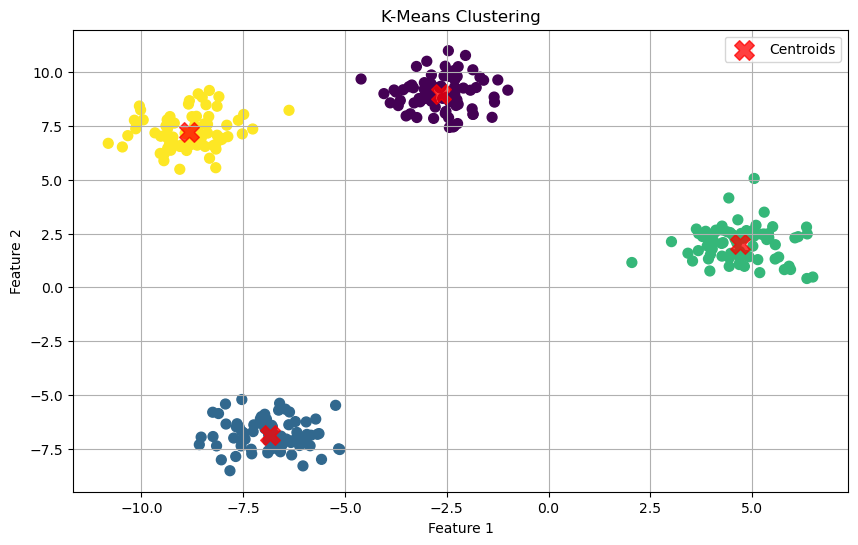

e:\Download\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
e:\Download\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
e:\Download\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
e:\Download\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

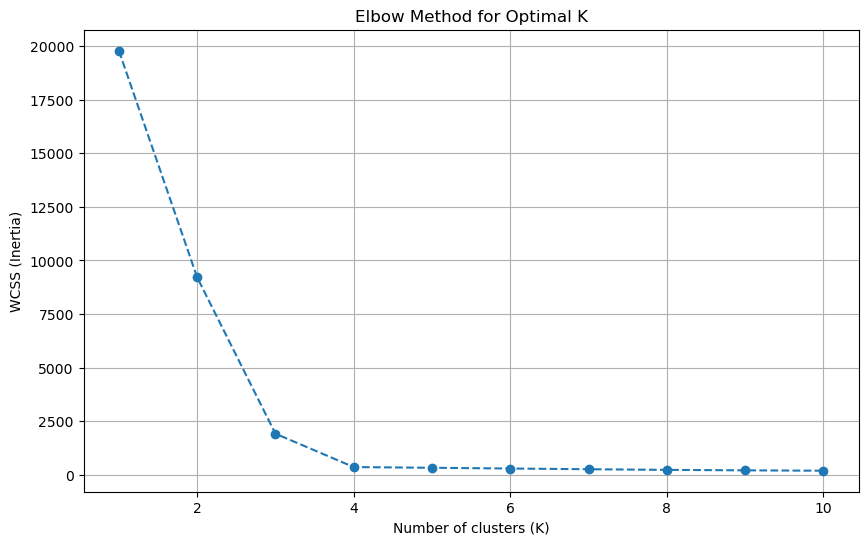

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. 生成模拟数据
# %matplotlib inline
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. 创建并训练K-Means模型
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 3. 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 4. 使用"肘部法则"确定最优K值 (可选)
wcss = []
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow.fit(X)
    wcss.append(kmeans_elbow.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

**优缺点总结**
*   **优点**：算法简单，易于实现，计算效率高。
*   **缺点**：需要预先指定 `K` 值；对初始质心选择敏感，可能陷入局部最优；对非球形簇和大小不一的簇效果不佳；对异常值敏感。

---

#### **3.2 主成分分析 (Principal Component Analysis, PCA)**

**内容**

*   **目标**：一种最常用的**线性降维**方法。它找到一组新的正交坐标轴（主成分），使得数据在这些轴上的方差最大化。
*   **核心思想**：用更少的特征来表示数据，同时尽可能多地保留原始数据的信息（方差）。第一个主成分捕捉了数据中最大的方差方向，第二个主成分在与第一个正交的平面上捕捉剩余方差最大的方向，以此类推。

**公式推导 (最大方差理论)**

1.  **数据中心化**：首先将数据的所有特征减去其均值，使得数据中心在原点。$X' = X - \bar{X}$。
2.  **目标**：找到一个单位向量 $w$（一个投影方向），使得数据投影到这个方向上的方差最大。
    *   投影后的数据为 $X'w$。
    *   投影后的方差为:
        $Var(X'w) = \frac{1}{m} (X'w)^T (X'w) = w^T (\frac{1}{m} X'^T X') w = w^T \Sigma w$
        其中 $\Sigma = \frac{1}{m} X'^T X'$ 是数据的**协方差矩阵**。
3.  **优化问题**：
    $\max_{w} \quad w^T \Sigma w$
    $\text{subject to} \quad ||w||^2 = w^T w = 1$
4.  **求解**：使用拉格朗日乘子法构造函数：
    $L(w, \lambda) = w^T \Sigma w - \lambda(w^T w - 1)$
    对 $w$ 求导并令其为0：
    $\frac{\partial L}{\partial w} = 2\Sigma w - 2\lambda w = 0 \Rightarrow \Sigma w = \lambda w$
    这是一个经典的**特征值问题**！
    *   $w$ 是协方差矩阵 $\Sigma$ 的**特征向量**。
    *   $\lambda$ 是对应的**特征值**。
    我们要最大化的方差 $w^T \Sigma w = w^T (\lambda w) = \lambda w^T w = \lambda$。因此，为了最大化方差，我们应该选择**最大特征值对应的特征向量**作为第一个主成分。
5.  **降维**：要将数据降到 `k` 维，我们只需选择协方差矩阵最大的 `k` 个特征值所对应的特征向量，构成一个投影矩阵 $W_{n \times k}$，然后用原始数据乘以这个矩阵即可：$X_{new} = X' W$。

第一个主成分解释的方差比例: 0.1203
第二个主成分解释的方差比例: 0.0956
总共解释的方差比例: 0.2159


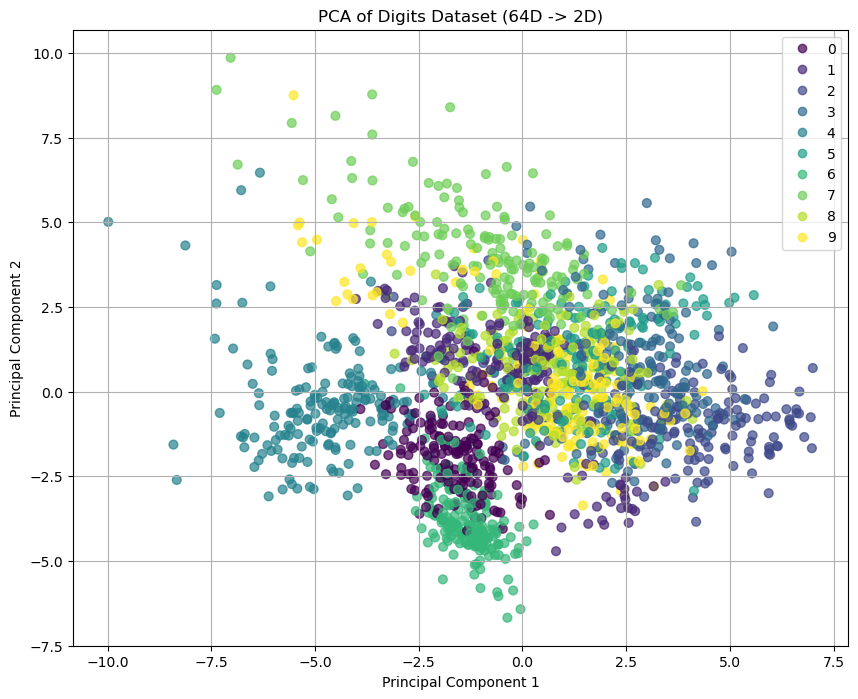

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# 1. 加载数据集 (手写数字)
# %matplotlib inline
digits = load_digits()
X = digits.data # 64个特征 (8x8像素)
y = digits.target

# 2. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 应用PCA降维 (从64维降到2维)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 查看主成分和解释的方差比例
print(f"第一个主成分解释的方差比例: {pca.explained_variance_ratio_[0]:.4f}")
print(f"第二个主成分解释的方差比例: {pca.explained_variance_ratio_[1]:.4f}")
print(f"总共解释的方差比例: {np.sum(pca.explained_variance_ratio_):.4f}")

# 5. 可视化降维后的数据
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40, alpha=0.7)
plt.title('PCA of Digits Dataset (64D -> 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.grid(True)
plt.show()

**优缺点总结**
*   **优点**：无监督，应用方便；通过去除噪声和冗余信息，可能提高后续模型的性能；可用于数据可视化。
*   **缺点**：是一种线性变换，对非线性结构的数据降维效果不佳；降维后的主成分可解释性较差；可能会丢失一些有用的信息。

---

### **4. 经典机器学习的最新成果与现代视角**

即使在深度学习时代，经典机器学习算法依然充满活力，并与现代技术紧密结合。

1.  **性能之王：GBDT的进化**
    *   在**结构化数据（表格数据）**上，以**XGBoost、LightGBM、CatBoost**为代表的GBDT变体，仍然是当之无愧的性能王者，经常在Kaggle等数据竞赛中击败复杂的神经网络。它们在原始GBDT的基础上，对损失函数、正则化、计算效率等方面做了大量优化。

2.  **可解释性AI (XAI) 的基石**
    *   随着AI模型越来越复杂（如深度学习），其“黑盒”特性成为一大挑战。经典模型（如线性回归、决策树）因其**天然的可解释性**，成为XAI领域的重要工具。
    *   **SHAP (SHapley Additive exPlanations)** 和 **LIME (Local Interpretable Model-agnostic Explanations)** 等现代XAI框架，其核心思想就是用简单的、可解释的本地模型（如线性回归）来近似复杂模型的局部行为。

3.  **深度学习的基础模块**
    *   经典机器学习的概念是深度学习的基石。
        *   **全连接层**本质上就是线性回归/逻辑回归的推广。
        *   **损失函数**（MSE、交叉熵）和**优化器**（梯度下降）是两个领域共享的核心概念。
        *   理解SVM的**核技巧**有助于理解深度学习中如何通过非线性变换来增加模型容量。

4.  **混合模型 (Hybrid Models)**
    *   在很多实际应用中，人们会将经典模型与深度学习结合。例如，使用深度学习模型（如CNN）从图像中提取高级特征，然后将这些特征输入到一个经典模型（如SVM或GBDT）中进行最终的分类或回归。这种方法结合了深度学习强大的特征提取能力和经典模型在特定任务上的高效性。

5.  **自动化机器学习 (AutoML)**
    *   AutoML工具（如Google AutoML, H2O.ai）的目标是自动化模型选择、特征工程和超参数调优的过程。在这些工具的后台，通常会并行测试大量的经典机器学习模型（以及神经网络），并使用集成方法将它们组合起来，以找到针对特定数据集的最佳解决方案。

